In [3]:
import numpy as np
from PIL import Image

# Load the two RGB images
image1 = Image.open('/home/souraja/ResViT/results/CT_MRI_pre_trained_no_gdl/test_latest/images/CTP15.4100001_real_B.png')
image2 = Image.open('/home/souraja/ResViT/results/CT_MRI_pre_trained_no_gdl/test_latest/images/CTP15.4100001_fake_B.png')

# Convert the images to NumPy arrays
array1 = np.array(image1)
array2 = np.array(image2)

# Calculate the pixel-wise difference
difference = np.abs(array1 - array2)

# Create a new image from the difference array
diff_image = Image.fromarray(difference.astype(np.uint8))

# Save the difference image
diff_image.save('/home/souraja/Downloads/difference_Pretrained_nogdl.jpg')


In [2]:
import numpy as np
from PIL import Image

# Load the two RGB images
image1 = Image.open('/home/souraja/ResViT/results/CT_MRI_pre_trained/test_latest/images/CTP15.4100001_real_B.png')
image2 = Image.open('/home/souraja/ResViT/results/CT_MRI_pre_trained/test_latest/images/CTP15.4100001_fake_B.png')

# Convert the images to NumPy arrays
array1 = np.array(image1)
array2 = np.array(image2)

# Calculate the pixel-wise difference
difference = np.abs(array1 - array2)

# Create a new image from the difference array
diff_image = Image.fromarray(difference.astype(np.uint8))

# Save the difference image
diff_image.save('/home/souraja/Downloads/difference_Pretrained.jpg')


In [5]:
import numpy as np
from PIL import Image

# Load the two RGB images
image1 = Image.open('/home/souraja/Downloads/difference_Pretrained.jpg')
image2 = Image.open('/home/souraja/Downloads/difference_Pretrained_nogdl.jpg')

# Convert the images to NumPy arrays
array1 = np.array(image1)
array2 = np.array(image2)

# Calculate the pixel-wise difference
difference = np.abs(array1 - array2)

# Create a new image from the difference array
diff_image = Image.fromarray(difference.astype(np.uint8))

# Save the difference image
diff_image.save('/home/souraja/Downloads/difference.jpg')


In [48]:
import numpy as np
from PIL import Image
from skimage.metrics import structural_similarity as ssim

# Load the pairs of RGB images
pair1_image1 = Image.open('/home/souraja/ResViT/results/CT_MRI_resvit/test_latest/images/CTP15.4100001_real_B.png')
pair1_image2 = Image.open('/home/souraja/ResViT/results/CT_MRI_resvit/test_latest/images/CTP15.4100001_fake_B.png')
pair2_image1 = Image.open('/home/souraja/ResViT/results/CT_MRI_resvit(orig)/test_latest/images/CTP15.4100001_real_B.png')
pair2_image2 = Image.open('/home/souraja/ResViT/results/CT_MRI_resvit(orig)/test_latest/images/CTP15.4100001_fake_B.png')

# Convert the images to grayscale arrays
pair1_array1 = np.array(pair1_image1.convert('L'))
pair1_array2 = np.array(pair1_image2.convert('L'))
pair2_array1 = np.array(pair2_image1.convert('L'))
pair2_array2 = np.array(pair2_image2.convert('L'))

# Calculate SSIM and MSE for the first pair
ssim_pair1 = ssim(pair1_array1, pair1_array2)
print(ssim_pair1)
mse_pair1 = np.mean((pair1_array1 - pair1_array2) ** 2)
print(mse_pair1)

# Calculate SSIM and MSE for the second pair
ssim_pair2 = ssim(pair2_array1, pair2_array2)
print(ssim_pair2)
mse_pair2 = np.mean((pair2_array1 - pair2_array2) ** 2)
print(mse_pair2)

# Compare the SSIM and MSE values to determine the resemblance
if ssim_pair1 > ssim_pair2 and mse_pair1 < mse_pair2:
    print("Pair 1 closely resembles each other.")
elif ssim_pair2 > ssim_pair1 and mse_pair2 < mse_pair1:
    print("Pair 2 closely resembles each other.")
else:
    print("Both pairs have a similar resemblance.")


0.7184205965972306
32.998809814453125
0.7249067181444788
32.17378234863281
Pair 2 closely resembles each other.


In [8]:
import numpy as np
from PIL import Image
from skimage.metrics import structural_similarity as ssim

# Load the pairs of RGB images
pair1_image1 = Image.open('/home/souraja/ResViT/results/CT_MRI_pre_trained/test_latest/images/CTP15.4100001_fake_B.png')
pair1_image2 = Image.open('/home/souraja/ResViT/results/CT_MRI_pre_trained/test_latest/images/CTP15.4100001_real_B.png')
pair2_image1 = Image.open('/home/souraja/ResViT/results/CT_MRI_resvit/test_latest/images/CTP15.4100001_fake_B.png')
pair2_image2 = Image.open('/home/souraja/ResViT/results/CT_MRI_resvit/test_latest/images/CTP15.4100001_real_B.png')

# Convert the images to grayscale arrays
pair1_array1 = np.array(pair1_image1.convert('L'))
pair1_array2 = np.array(pair1_image2.convert('L'))
pair2_array1 = np.array(pair2_image1.convert('L'))
pair2_array2 = np.array(pair2_image2.convert('L'))

# Calculate SSIM and MSE for the first pair
ssim_pair1 = ssim(pair1_array1, pair1_array2)
print(ssim_pair1)
mse_pair1 = np.mean((pair1_array1 - pair1_array2) ** 2)
print(mse_pair1)

# Calculate SSIM and MSE for the second pair
ssim_pair2 = ssim(pair2_array1, pair2_array2)
print(ssim_pair2)
mse_pair2 = np.mean((pair2_array1 - pair2_array2) ** 2)
print(mse_pair2)

# Compare the SSIM and MSE values to determine the resemblance
if ssim_pair1 > ssim_pair2 and mse_pair1 < mse_pair2:
    print("Pair 1 closely resembles each other.")
elif ssim_pair2 > ssim_pair1 and mse_pair2 < mse_pair1:
    print("Pair 2 closely resembles each other.")
else:
    print("Both pairs have a similar resemblance.")


0.7040271960952075
33.32676696777344
0.7436189216585739
32.39404296875
Pair 2 closely resembles each other.


In [29]:
import cv2
import SimpleITK as sitk
import numpy as np

def register_images(ct_path, mri_path):
    # Read the CT and MRI images
    ct_image = cv2.imread(ct_path, cv2.IMREAD_GRAYSCALE)
    mri_image = cv2.imread(mri_path, cv2.IMREAD_GRAYSCALE)

    # Preprocess the images if necessary (e.g., rescale intensity, cropping, etc.)

    # Convert images to SimpleITK format
    ct_image_sitk = sitk.GetImageFromArray(ct_image)
    mri_image_sitk = sitk.GetImageFromArray(mri_image)

    # Define the registration method
    registration_method = sitk.ImageRegistrationMethod()

    # Set the similarity metric (e.g., mutual information)
    registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)

    # Set the optimizer (e.g., gradient descent)
    registration_method.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=100, convergenceMinimumValue=1e-6, convergenceWindowSize=10)

    # Set the interpolator (e.g., linear interpolation)
    registration_method.SetInterpolator(sitk.sitkLinear)
    
    print(ct_image_sitk.GetSize())
    print(mri_image_sitk.GetSize())

    # Set the initial transform (e.g., identity transform)
    initial_transform = sitk.CenteredTransformInitializer(ct_image_sitk, mri_image_sitk, sitk.Euler3DTransform(),
                                                          sitk.CenteredTransformInitializerFilter.GEOMETRY)
    registration_method.SetInitialTransform(initial_transform, inPlace=False)

    # Perform the registration
    final_transform = registration_method.Execute(ct_image_sitk, mri_image_sitk)

    # Apply the transformation to the CT image
    ct_registered_sitk = sitk.Resample(ct_image_sitk, mri_image_sitk, final_transform, sitk.sitkLinear, 0.0,
                                       sitk.sitkFloat32)

    # Convert the registered image back to NumPy array
    ct_registered = sitk.GetArrayFromImage(ct_registered_sitk)

    return ct_registered

# Specify the paths to the CT and MRI images
ct_path = '/home/souraja/ResViT/results/CT_MRI_resvit_no_gdl_2953/test_latest/images/CTP15.4100001_real_A.png'
mri_path = '/home/souraja/ResViT/results/CT_MRI_resvit_no_gdl_2953/test_latest/images/CTP15.4100001_real_B.png'

# Perform image registration
registered_ct = register_images(ct_path, mri_path)



(256, 256)
(256, 256)


RuntimeError: Exception thrown in SimpleITK CenteredTransformInitializer: /tmp/SimpleITK/Code/BasicFilters/src/sitkCenteredTransformInitializerFilter.cxx:87:
sitk::ERROR: Transform parameter for CenteredTransformInitializerFilter doesn't match dimension!

In [10]:
import numpy as np
from PIL import Image
from skimage.metrics import structural_similarity as ssim

# Load the pairs of RGB images
pair1_image1 = Image.open('/home/souraja/ResViT/results/CT_MRI_resvit/test_latest/images/CTP15.4100001_real_B.png')
pair1_image2 = Image.open('/home/souraja/ResViT/results/CT_MRI_resvit/test_latest/images/CTP15.4100001_fake_B.png')
pair2_image1 = Image.open('/home/souraja/ResViT/results/CT_MRI_resvit_no_gdl_2953/test_latest/images/CTP15.4100001_real_B.png')
pair2_image2 = Image.open('/home/souraja/ResViT/results/CT_MRI_resvit_no_gdl_2953/test_latest/images/CTP15.4100001_fake_B.png')

# Convert the images to grayscale arrays
pair1_array1 = np.array(pair1_image1.convert('L'))
pair1_array2 = np.array(pair1_image2.convert('L'))
pair2_array1 = np.array(pair2_image1.convert('L'))
pair2_array2 = np.array(pair2_image2.convert('L'))

# Calculate SSIM and MSE for the first pair
ssim_pair1 = ssim(pair1_array1, pair1_array2)
print(ssim_pair1)
mse_pair1 = np.mean((pair1_array1 - pair1_array2) ** 2)
print(mse_pair1)

# Calculate SSIM and MSE for the second pair
ssim_pair2 = ssim(pair2_array1, pair2_array2)
print(ssim_pair2)
mse_pair2 = np.mean((pair2_array1 - pair2_array2) ** 2)
print(mse_pair2)

# Compare the SSIM and MSE values to determine the resemblance
if ssim_pair1 > ssim_pair2 and mse_pair1 < mse_pair2:
    print("Pair 1 closely resembles each other.")
elif ssim_pair2 > ssim_pair1 and mse_pair2 < mse_pair1:
    print("Pair 2 closely resembles each other.")
else:
    print("Both pairs have a similar resemblance.")

0.7436189216585739
32.39404296875
0.7249067181444788
32.17378234863281
Both pairs have a similar resemblance.


Final metric value: -0.7094151933730083
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 25.


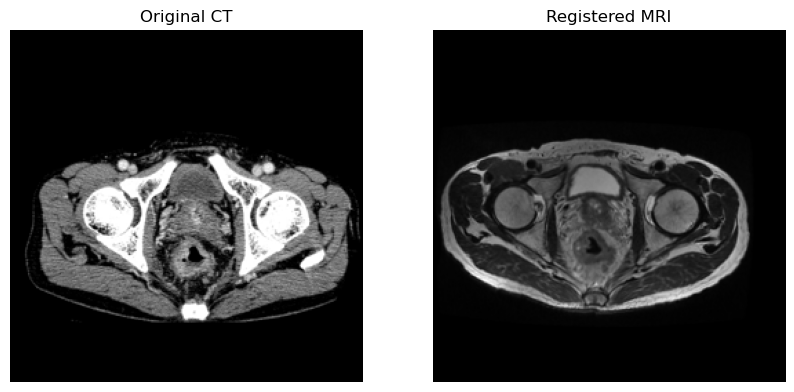

In [43]:
import cv2
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

def register_images(ct_path, mri_path):
    # Read the CT and MRI images
    ct_image = cv2.imread(ct_path, cv2.IMREAD_GRAYSCALE)
    mri_image = cv2.imread(mri_path, cv2.IMREAD_GRAYSCALE)

    # Convert images to SimpleITK format
    ct_image_sitk = sitk.GetImageFromArray(ct_image)
    mri_image_sitk = sitk.GetImageFromArray(mri_image)

    registration_method = sitk.ImageRegistrationMethod()

    # Similarity metric settings.
    registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
    registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
    registration_method.SetMetricSamplingPercentage(0.01)
    registration_method.SetInterpolator(sitk.sitkLinear)

    # Optimizer settings.
    registration_method.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=100, convergenceMinimumValue=1e-6, convergenceWindowSize=10)
    registration_method.SetOptimizerScalesFromPhysicalShift()

    # Setup for the multi-resolution framework.
    registration_method.SetShrinkFactorsPerLevel(shrinkFactors=[4, 2, 1])
    registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[2, 1, 0])
    registration_method.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()

    # Set the initial transform (e.g., identity transform)
    initial_transform = sitk.Euler2DTransform()
    registration_method.SetInitialTransform(initial_transform, inPlace=False)

    # Cast the images to sitkFloat32
    ct_image_sitk = sitk.Cast(ct_image_sitk, sitk.sitkFloat32)
    mri_image_sitk = sitk.Cast(mri_image_sitk, sitk.sitkFloat32)

    # Execute the registration
    final_transform = registration_method.Execute(ct_image_sitk, mri_image_sitk)

    print('Final metric value: {0}'.format(registration_method.GetMetricValue()))
    print('Optimizer\'s stopping condition: {0}'.format(registration_method.GetOptimizerStopConditionDescription()))

    # Apply the transformation to the MRI image
    mri_registered_sitk = sitk.Resample(mri_image_sitk, ct_image_sitk, final_transform, sitk.sitkLinear, 0.0,
                                        sitk.sitkFloat32)

    # Convert the registered image back to NumPy array
    mri_registered = sitk.GetArrayFromImage(mri_registered_sitk)

    # Visualize the images side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(ct_image, cmap='gray')
    axes[0].set_title('Original CT')
    axes[0].axis('off')

    axes[1].imshow(mri_registered, cmap='gray')
    axes[1].set_title('Registered MRI')
    axes[1].axis('off')

    plt.show()

    return mri_registered

# Specify the paths to the CT and MRI images
ct_path = '/home/souraja/ResViT/results/CT_MRI_resvit_no_gdl_2953/test_latest/images/CTP15.4100001_real_A.png'
mri_path = '/home/souraja/ResViT/results/CT_MRI_resvit_no_gdl_2953/test_latest/images/CTP15.4100001_real_B.png'

# Perform image registration and visualize the images side by side
registered_ct = register_images(ct_path, mri_path)


In [45]:
import os
import cv2
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

def register_images(ct_folder, mri_folder, output_folder):
    # Get the list of filenames in the CT folder
    ct_filenames = os.listdir(ct_folder)

    # Iterate over the CT filenames
    for ct_filename in ct_filenames:
        # Construct the paths to CT and MRI images
        ct_path = os.path.join(ct_folder, ct_filename)
        mri_path = os.path.join(mri_folder, ct_filename)

        # Read the CT and MRI images
        ct_image = cv2.imread(ct_path, cv2.IMREAD_GRAYSCALE)
        mri_image = cv2.imread(mri_path, cv2.IMREAD_GRAYSCALE)

        # Convert images to SimpleITK format
        ct_image_sitk = sitk.GetImageFromArray(ct_image)
        mri_image_sitk = sitk.GetImageFromArray(mri_image)

        registration_method = sitk.ImageRegistrationMethod()

        # Similarity metric settings.
        registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
        registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
        registration_method.SetMetricSamplingPercentage(0.01)
        registration_method.SetInterpolator(sitk.sitkLinear)

        # Optimizer settings.
        registration_method.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=100, convergenceMinimumValue=1e-6, convergenceWindowSize=10)
        registration_method.SetOptimizerScalesFromPhysicalShift()

        # Setup for the multi-resolution framework.
        registration_method.SetShrinkFactorsPerLevel(shrinkFactors=[4, 2, 1])
        registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[2, 1, 0])
        registration_method.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()

        # Set the initial transform (e.g., identity transform)
        initial_transform = sitk.Euler2DTransform()
        registration_method.SetInitialTransform(initial_transform, inPlace=False)

        # Cast the images to sitkFloat32
        ct_image_sitk = sitk.Cast(ct_image_sitk, sitk.sitkFloat32)
        mri_image_sitk = sitk.Cast(mri_image_sitk, sitk.sitkFloat32)

        # Execute the registration
        final_transform = registration_method.Execute(ct_image_sitk, mri_image_sitk)

        print('Final metric value: {0}'.format(registration_method.GetMetricValue()))
        print('Optimizer\'s stopping condition: {0}'.format(registration_method.GetOptimizerStopConditionDescription()))

        # Apply the transformation to the MRI image
        mri_registered_sitk = sitk.Resample(mri_image_sitk, ct_image_sitk, final_transform, sitk.sitkLinear, 0.0,
                                            sitk.sitkFloat32)

        # Convert the registered image back to NumPy array
        mri_registered = sitk.GetArrayFromImage(mri_registered_sitk)

        # Save the registered MRI image with the same name
        output_path = os.path.join(output_folder, ct_filename)
        cv2.imwrite(output_path, mri_registered)

        print('Registered MRI image saved at: {0}'.format(output_path))

# Specify the paths to the CT and MRI folders and output folder
ct_folder = '/home/souraja/trainA'
mri_folder = '/home/souraja/trainB'
output_folder = '/home/souraja/reg_mri'

# Perform image registration and save the registered MRI images
register_images(ct_folder, mri_folder, output_folder)


Final metric value: -0.37329214974309793
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Registered MRI image saved at: /home/souraja/reg_mri/CTP3200057.jpg
Final metric value: -0.4745984367619109
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 25.
Registered MRI image saved at: /home/souraja/reg_mri/CTP54.1300001.jpg
Final metric value: -0.4138412110832313
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Registered MRI image saved at: /home/souraja/reg_mri/CTP3000009.jpg
Final metric value: -0.4866648322592301
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Registered MRI image saved at: /home/souraja/reg_mri/CTP13.3200001.jpg
Final metric value: -0.6244565141533991
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Converg

RuntimeError: Exception thrown in SimpleITK ImageRegistrationMethod_Execute: /tmp/SimpleITK-build/ITK-prefix/include/ITK-5.3/itkMattesMutualInformationImageToImageMetricv4.hxx:307:
ITK ERROR: MattesMutualInformationImageToImageMetricv4(0x64ec280): All samples map outside moving image buffer. The images do not sufficiently overlap. They need to be initialized to have more overlap before this metric will work. For instance, you can align the image centers by translation.


In [46]:
import os
import cv2
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

def register_images(ct_folder, mri_folder, output_folder):
    # Get the list of filenames in the CT folder
    ct_filenames = os.listdir(ct_folder)

    # Iterate over the CT filenames
    for ct_filename in ct_filenames:
        # Construct the paths to CT and MRI images
        ct_path = os.path.join(ct_folder, ct_filename)
        mri_path = os.path.join(mri_folder, ct_filename)

        # Read the CT and MRI images
        ct_image = cv2.imread(ct_path, cv2.IMREAD_GRAYSCALE)
        mri_image = cv2.imread(mri_path, cv2.IMREAD_GRAYSCALE)

        # Convert images to SimpleITK format
        ct_image_sitk = sitk.GetImageFromArray(ct_image)
        mri_image_sitk = sitk.GetImageFromArray(mri_image)

        registration_method = sitk.ImageRegistrationMethod()

        # Similarity metric settings.
        registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
        registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
        registration_method.SetMetricSamplingPercentage(0.01)
        registration_method.SetInterpolator(sitk.sitkLinear)

        # Optimizer settings.
        registration_method.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=100, convergenceMinimumValue=1e-6, convergenceWindowSize=10)
        registration_method.SetOptimizerScalesFromPhysicalShift()

        # Setup for the multi-resolution framework.
        registration_method.SetShrinkFactorsPerLevel(shrinkFactors=[4, 2, 1])
        registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[2, 1, 0])
        registration_method.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()

        # Set the initial transform (translation to align centers)
        initial_transform = sitk.CenteredTransformInitializer(
            ct_image_sitk, mri_image_sitk, sitk.Euler2DTransform(),
            sitk.CenteredTransformInitializerFilter.GEOMETRY)
        registration_method.SetInitialTransform(initial_transform, inPlace=False)

        # Cast the images to sitkFloat32
        ct_image_sitk = sitk.Cast(ct_image_sitk, sitk.sitkFloat32)
        mri_image_sitk = sitk.Cast(mri_image_sitk, sitk.sitkFloat32)

        # Execute the registration
        final_transform = registration_method.Execute(ct_image_sitk, mri_image_sitk)

        print('Final metric value: {0}'.format(registration_method.GetMetricValue()))
        print('Optimizer\'s stopping condition: {0}'.format(registration_method.GetOptimizerStopConditionDescription()))

        # Apply the transformation to the MRI image
        mri_registered_sitk = sitk.Resample(mri_image_sitk, ct_image_sitk, final_transform, sitk.sitkLinear, 0.0,
                                            sitk.sitkFloat32)

        # Convert the registered image back to NumPy array
        mri_registered = sitk.GetArrayFromImage(mri_registered_sitk)

        # Save the registered MRI image with the same name in the output folder
        output_path = os.path.join(output_folder, ct_filename)
        cv2.imwrite(output_path, mri_registered)

# Specify the paths to the CT and MRI folders and the output folder
ct_folder = '/home/souraja/trainA'
mri_folder = '/home/souraja/trainB'
output_folder = '/home/souraja/reg_mri'

# Perform image registration and save the registered MRI images
register_images(ct_folder, mri_folder, output_folder)


Final metric value: -0.38180564437906844
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5205302287463888
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.4073190545397266
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4658141801168781
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.6406921495810929
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.5371943266299389
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 20.
Final metric value: -0.44076373622070336
Optimizer's stopping condition: GradientDescentO

Final metric value: -0.4166016251131916
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.3952258916406788
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.36307085183339155
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.4774642242329789
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3043824231882845
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 32.
Final metric value: -0.38432272359289416
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.24290617956497404
Optimizer's stopping condition: GradientDescent

Final metric value: -0.47625792054593313
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 22.
Final metric value: -0.47340427051994544
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 19.
Final metric value: -0.27082868947885186
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.3539180995288245
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.4736929152012384
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.31553693304734337
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.418790679765591
Optimizer's stopping condition: GradientDescen

Final metric value: -0.4122994971802275
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.36058295248097744
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 25.
Final metric value: -0.5193828101769121
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.6322259740100844
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.6447043991865066
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.43986430354867717
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.36857274190881006
Optimizer's stopping condition: GradientDescen

Final metric value: -0.3648594886127218
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.35259579044242756
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.6059988279334797
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.19523302265759676
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.18550939984015546
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.452964196538399
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 16.
Final metric value: -0.5517833335830811
Optimizer's stopping condition: GradientDescentOp

Final metric value: -0.24445305312684523
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.48979958255360784
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 40.
Final metric value: -0.36108365315826196
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3309425122933066
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4471681763177898
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.42202961294386127
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.4246596509859173
Optimizer's stopping condition: GradientDescent

Final metric value: -0.32184489983644976
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.4682347955531509
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5330688024949353
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.3806220379477005
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4678438002901685
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 21.
Final metric value: -0.3217512557634502
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.44706225681420125
Optimizer's stopping condition: GradientDescentO

Final metric value: -0.554689625533322
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4653623563172319
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.595734364766315
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.6172952606213775
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.30096340886450446
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 17.
Final metric value: -0.35223573629977484
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 19.
Final metric value: -0.38818821682368343
Optimizer's stopping condition: GradientDescentOpt

Final metric value: -0.404216477632664
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.386303175474892
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3691571320573771
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5424770736840924
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4412854179536081
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4923105759366585
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.5108177303318809
Optimizer's stopping condition: GradientDescentOptimiz

Final metric value: -0.42229447643894924
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.35907970989311827
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 17.
Final metric value: -0.22561657918293912
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.47709144226314587
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.2531975211500032
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.4215444543864428
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.37677443790167325
Optimizer's stopping condition: GradientDesc

Final metric value: -0.38265783763691474
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 26.
Final metric value: -0.2980255846490958
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.45496732741976736
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.4629078851589571
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 17.
Final metric value: -0.4178491723557325
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 23.
Final metric value: -0.34418654204879934
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4771225584607463
Optimizer's stopping condition: GradientDescent

Final metric value: -0.47389423736661973
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.41203280363389416
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.39849155445402173
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.4268379356683467
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 29.
Final metric value: -0.39330375290163694
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.5412722980512049
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 37.
Final metric value: -0.5319507056117049
Optimizer's stopping condition: GradientDesce

Final metric value: -0.523464168196124
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.37942693326541355
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.5959483159437736
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.292108525574901
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.4995101112438739
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 23.
Final metric value: -0.4168168508561602
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.30185022327321487
Optimizer's stopping condition: GradientDescentO

Final metric value: -0.4143327700127849
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.5014727260420013
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 23.
Final metric value: -0.25199794361615035
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.3254950967776606
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.45229367808825904
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.38499933441869455
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 25.
Final metric value: -0.47655436400960255
Optimizer's stopping condition: GradientDesce

Final metric value: -0.4566649276259527
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.6260969890718251
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.26412061773339096
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 35.
Final metric value: -0.5701760632994698
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.27126953928643815
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 48.
Final metric value: -0.3931395800864703
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.42391754738201026
Optimizer's stopping condition: GradientDescent

Final metric value: -0.4662069703117972
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 16.
Final metric value: -0.3949559349094387
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.5410059991571201
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4784268587430862
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.5537329761412055
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.44775390280856014
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 22.
Final metric value: -0.4136114135094672
Optimizer's stopping condition: GradientDescentO

Final metric value: -0.5045047547001562
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.3737209971995679
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.3986682735662467
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.43369696389828705
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.3832830706038062
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4217601013791039
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.5196963886976358
Optimizer's stopping condition: GradientDescentO

Final metric value: -0.406639209014968
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.6270086220543298
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 20.
Final metric value: -0.6249462698391633
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.2278481243057815
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3521535986895981
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 27.
Final metric value: -0.49070606224982244
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 16.
Final metric value: -0.3202703024910883
Optimizer's stopping condition: GradientDescentOpt

Final metric value: -0.53373954868166
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.2537738580871063
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 31.
Final metric value: -0.47845452167956487
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 28.
Final metric value: -0.2300917708726309
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.4675027484470156
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.4138837532131608
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.5508900849559015
Optimizer's stopping condition: GradientDescentOpt

Final metric value: -0.47413110383628826
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 27.
Final metric value: -0.4778329286135944
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 17.
Final metric value: -0.480220547424874
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4667267325825264
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 29.
Final metric value: -0.5895500378172929
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.29473081863607825
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.2891314769661303
Optimizer's stopping condition: GradientDescentO

Final metric value: -0.3754842153200669
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.40310578550615
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.3558835333092839
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.49239903273947
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 21.
Final metric value: -0.3620416008993221
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.45188655115353715
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 18.
Final metric value: -0.2857357246062874
Optimizer's stopping condition: GradientDescentOptimi

Final metric value: -0.4878547579363738
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 16.
Final metric value: -0.42569641443671247
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 27.
Final metric value: -0.5058219887183845
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 27.
Final metric value: -0.2752164673741007
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 18.
Final metric value: -0.21824988565293924
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.35824348363780817
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.37868493875390974
Optimizer's stopping condition: GradientDescen

Final metric value: -0.4081850166615525
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4241327330139446
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.39667321694253194
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.41842121069606625
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.398177442554989
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.5780645808145597
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 19.
Final metric value: -0.45592126129996324
Optimizer's stopping condition: GradientDescentOpt

Final metric value: -0.4063349384803979
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.20622036331233226
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.3634421152580645
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.3661712426655198
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 17.
Final metric value: -0.5945289494396202
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5960286541620753
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 18.
Final metric value: -0.28376637028192936
Optimizer's stopping condition: GradientDescent

Final metric value: -0.5138565788979572
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.40773883945756484
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5467940190297279
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4483090539321539
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 18.
Final metric value: -0.4383608150396015
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 25.
Final metric value: -0.49965869487330544
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.5382682128982759
Optimizer's stopping condition: GradientDescentO

Final metric value: -0.5046651137528188
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 19.
Final metric value: -0.4354114077662108
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.43718918385299127
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3607160609879458
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.45963395191605105
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 31.
Final metric value: -0.5048717492444643
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 26.
Final metric value: -0.5417152341067089
Optimizer's stopping condition: GradientDescent

Final metric value: -0.41270600939702207
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5868990945418868
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 27.
Final metric value: -0.4235291210779192
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.4193317474868352
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3608984739770613
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5412148888871289
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 32.
Final metric value: -0.311482749475393
Optimizer's stopping condition: GradientDescentOpti

Final metric value: -0.4430572407982164
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 42.
Final metric value: -0.37582006764657455
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.42328108819530974
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5118649849704174
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.4708627388982415
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.26312074470857033
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 17.
Final metric value: -0.47743041598026653
Optimizer's stopping condition: GradientDescent

Final metric value: -0.5846725695936492
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 16.
Final metric value: -0.4775066157981394
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 16.
Final metric value: -0.5706897565901454
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.4349454162923038
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.39831127918630094
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.6514705311974138
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.32863760949211135
Optimizer's stopping condition: GradientDescent

Final metric value: -0.40199924995678044
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 20.
Final metric value: -0.5401506374902125
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 21.
Final metric value: -0.408147070305624
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3927935366874574
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 18.
Final metric value: -0.43285474735416085
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.49514007942314764
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 23.
Final metric value: -0.3635035897644424
Optimizer's stopping condition: GradientDescent

Final metric value: -0.5339703998485013
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 21.
Final metric value: -0.40807023077561994
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3012898626927025
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4312252948572383
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3887778469734535
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.6430915745509468
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 22.
Final metric value: -0.40971202296628534
Optimizer's stopping condition: GradientDescentOp

Final metric value: -0.5946711431184883
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5025720515566195
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4172788119658278
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 17.
Final metric value: -0.4300489510329847
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5775580945732932
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.3748421297214008
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.4377875354093991
Optimizer's stopping condition: GradientDescentOpti

Final metric value: -0.38015498144242627
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 17.
Final metric value: -0.4997523192725926
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.35038060510298563
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.49103473330365843
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.39910143507478396
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.43424139944389617
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.49511984421875516
Optimizer's stopping condition: GradientDesc

Final metric value: -0.5180672585606197
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 43.
Final metric value: -0.4352175176519508
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 22.
Final metric value: -0.5159261580231832
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4094979206457179
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.37641686042606803
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3968196262287501
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.4474311265781534
Optimizer's stopping condition: GradientDescentOpt

Final metric value: -0.38947173606791274
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3535929616260192
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4824888764509558
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.1387659565513367
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.6295783753297112
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 27.
Final metric value: -0.30404196572153014
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.5469280528391727
Optimizer's stopping condition: GradientDescentOpt

Final metric value: -0.40827882384220704
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.448304128523337
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.25015814815741283
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3491103934585516
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.4539349647020929
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4873002572601218
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 23.
Final metric value: -0.29589101423395775
Optimizer's stopping condition: GradientDescentO

Final metric value: -0.41686218227230587
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.6523010591610701
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.428601445814886
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.364129699262687
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.36219360701545916
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 16.
Final metric value: -0.3454879469201174
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.4057655328039504
Optimizer's stopping condition: GradientDescentOpti

Final metric value: -0.3848066032307133
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5884485682253259
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.485351859487524
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 19.
Final metric value: -0.29586429392755464
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.2217924930829301
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.42959102134467414
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.33302545444114606
Optimizer's stopping condition: GradientDescentOp

Final metric value: -0.3386168807126074
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.3779706486725687
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 19.
Final metric value: -0.6447110467423955
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3952327380325493
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.6127700252633638
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.4142779946297678
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.41633671015559937
Optimizer's stopping condition: GradientDescentO

Final metric value: -0.28045678840756577
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.5358299890637277
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.353211746689224
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.33666624372703013
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 47.
Final metric value: -0.5270629105947097
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.37249195372542293
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.42474342787836183
Optimizer's stopping condition: GradientDescentO

Final metric value: -0.545455860506935
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.3693715774375005
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5489031269223044
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.3717938013767407
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.371709677084861
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.44284635159550206
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.23986464590994067
Optimizer's stopping condition: GradientDescentOpt

Final metric value: -0.27886704145579044
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.3377131078368388
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 21.
Final metric value: -0.3833706294272919
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 17.
Final metric value: -0.5849196931891728
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 19.
Final metric value: -0.5133997780802438
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.37775776430258534
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.3061278375998104
Optimizer's stopping condition: GradientDescent

Final metric value: -0.3400944821699894
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 42.
Final metric value: -0.49675478736540923
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.48957257168356416
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 52.
Final metric value: -0.4022912982542087
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 22.
Final metric value: -0.37871655907392976
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 31.
Final metric value: -0.2878719484574923
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 16.
Final metric value: -0.4705944210184346
Optimizer's stopping condition: GradientDesce

Final metric value: -0.3461029051656754
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 38.
Final metric value: -0.2948288459778294
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.43795581294680686
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.41676253240747685
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 18.
Final metric value: -0.39401113189402
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.44322802877064815
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.2909858026852132
Optimizer's stopping condition: GradientDescentO

Final metric value: -0.5091160285135272
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 16.
Final metric value: -0.37528358075550655
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4185771041815833
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.337317918406963
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 16.
Final metric value: -0.4714928168284545
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3755174213643348
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 21.
Final metric value: -0.266416103229654
Optimizer's stopping condition: GradientDescentOpti

Final metric value: -0.4272814349927601
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3899008889647485
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4528892058190143
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4607057658032675
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 23.
Final metric value: -0.5403800962575216
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 22.
Final metric value: -0.5009886479659872
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.4565084968673359
Optimizer's stopping condition: GradientDescentOpti

Final metric value: -0.5033251561569689
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 19.
Final metric value: -0.5766433497577225
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.6784091511822816
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 22.
Final metric value: -0.2954086582464877
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 29.
Final metric value: -0.38175579270952514
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 33.
Final metric value: -0.48394146168992774
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3911641617218618
Optimizer's stopping condition: GradientDescentO

Final metric value: -0.32008242645859286
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3975861206511551
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.464415361826298
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.47321118535226153
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.2915545232625542
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.3204582184399682
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.5883816504847539
Optimizer's stopping condition: GradientDescentO

Final metric value: -0.42167009276142736
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 21.
Final metric value: -0.3891265367704904
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.3051077970054429
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 27.
Final metric value: -0.4725690094665429
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 21.
Final metric value: -0.1751909291509953
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3115466501780023
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.4100839319938868
Optimizer's stopping condition: GradientDescentO

Final metric value: -0.32379750892654563
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.32036587667119665
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 32.
Final metric value: -0.24788259181446268
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.3083345728360451
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.5704248300994476
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 23.
Final metric value: -0.6388940288698974
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 17.
Final metric value: -0.31983849870136455
Optimizer's stopping condition: GradientDesce

Final metric value: -0.436984872615899
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3649168289654948
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 20.
Final metric value: -0.29613679731196246
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.3003720711413829
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4967667629970924
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.6267152379394038
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 32.
Final metric value: -0.36144765512479315
Optimizer's stopping condition: GradientDescentOp

Final metric value: -0.39635224744551084
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3157380887341805
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 23.
Final metric value: -0.5308380079625951
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5524155589893811
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 26.
Final metric value: -0.1712264410607898
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4878116406743356
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 20.
Final metric value: -0.3767123489883281
Optimizer's stopping condition: GradientDescentOpt

Final metric value: -0.47802075984438386
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3509804325506752
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 24.
Final metric value: -0.6364680236503324
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5656025171488623
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 42.
Final metric value: -0.4281265382650757
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 22.
Final metric value: -0.48831416302489505
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.35461545693208174
Optimizer's stopping condition: GradientDescent

Final metric value: -0.5498370474639567
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 21.
Final metric value: -0.48295374849500916
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.2826521760868425
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.5240002418150772
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.40894324120495745
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.44628887592019434
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 27.
Final metric value: -0.44434202499725095
Optimizer's stopping condition: GradientDesce

In [47]:
import os
import cv2
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

def register_images(ct_folder, mri_folder, output_folder):
    # Get the list of filenames in the CT folder
    ct_filenames = os.listdir(ct_folder)

    # Iterate over the CT filenames
    for ct_filename in ct_filenames:
        # Construct the paths to CT and MRI images
        ct_path = os.path.join(ct_folder, ct_filename)
        mri_path = os.path.join(mri_folder, ct_filename)

        # Read the CT and MRI images
        ct_image = cv2.imread(ct_path, cv2.IMREAD_GRAYSCALE)
        mri_image = cv2.imread(mri_path, cv2.IMREAD_GRAYSCALE)

        # Convert images to SimpleITK format
        ct_image_sitk = sitk.GetImageFromArray(ct_image)
        mri_image_sitk = sitk.GetImageFromArray(mri_image)

        registration_method = sitk.ImageRegistrationMethod()

        # Similarity metric settings.
        registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
        registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
        registration_method.SetMetricSamplingPercentage(0.01)
        registration_method.SetInterpolator(sitk.sitkLinear)

        # Optimizer settings.
        registration_method.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=100, convergenceMinimumValue=1e-6, convergenceWindowSize=10)
        registration_method.SetOptimizerScalesFromPhysicalShift()

        # Setup for the multi-resolution framework.
        registration_method.SetShrinkFactorsPerLevel(shrinkFactors=[4, 2, 1])
        registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[2, 1, 0])
        registration_method.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()

        # Set the initial transform (translation to align centers)
        initial_transform = sitk.CenteredTransformInitializer(
            ct_image_sitk, mri_image_sitk, sitk.Euler2DTransform(),
            sitk.CenteredTransformInitializerFilter.GEOMETRY)
        registration_method.SetInitialTransform(initial_transform, inPlace=False)

        # Cast the images to sitkFloat32
        ct_image_sitk = sitk.Cast(ct_image_sitk, sitk.sitkFloat32)
        mri_image_sitk = sitk.Cast(mri_image_sitk, sitk.sitkFloat32)

        # Execute the registration
        final_transform = registration_method.Execute(ct_image_sitk, mri_image_sitk)

        print('Final metric value: {0}'.format(registration_method.GetMetricValue()))
        print('Optimizer\'s stopping condition: {0}'.format(registration_method.GetOptimizerStopConditionDescription()))

        # Apply the transformation to the MRI image
        mri_registered_sitk = sitk.Resample(mri_image_sitk, ct_image_sitk, final_transform, sitk.sitkLinear, 0.0,
                                            sitk.sitkFloat32)

        # Convert the registered image back to NumPy array
        mri_registered = sitk.GetArrayFromImage(mri_registered_sitk)

        # Save the registered MRI image with the same name in the output folder
        output_path = os.path.join(output_folder, ct_filename)
        cv2.imwrite(output_path, mri_registered)

# Specify the paths to the CT and MRI folders and the output folder
ct_folder = '/home/souraja/trainB'
mri_folder = '/home/souraja/trainA'
output_folder = '/home/souraja/reg_ct'

# Perform image registration and save the registered MRI images
register_images(ct_folder, mri_folder, output_folder)

Final metric value: -0.42522355593583633
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.5551287178988603
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.427104544593614
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 25.
Final metric value: -0.5354811186646947
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.6769867065807786
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4566168871853192
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.49892673951760297
Optimizer's stopping condition: GradientDescentOp

Final metric value: -0.3915353815067607
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 18.
Final metric value: -0.4985595805841403
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3213799953856138
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4081373273561168
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.30279953980717267
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.36031457287329327
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.34992594361729984
Optimizer's stopping condition: GradientDescentO

Final metric value: -0.40317835761357196
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.29311741566722155
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 17.
Final metric value: -0.41513898436192775
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.3739568812285751
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 17.
Final metric value: -0.44475574575971705
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.6115414683283945
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.3575347588458643
Optimizer's stopping condition: GradientDesc

Final metric value: -0.5576916125672714
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.671627069629696
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 21.
Final metric value: -0.673619675563767
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 28.
Final metric value: -0.45766748463172446
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.4068269855826533
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.42487217767693247
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5112954301023273
Optimizer's stopping condition: GradientDescentOpt

Final metric value: -0.40950534476874195
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.24403846540019902
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.44692391108192797
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 16.
Final metric value: -0.5052878105103991
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.23477493029312033
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.563143299422283
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.3386997731090972
Optimizer's stopping condition: GradientDesce

Final metric value: -0.3112168664255283
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4721012060076043
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.36730479192713184
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4124263985658267
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.446655324381714
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5296144530825563
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.46941228197689383
Optimizer's stopping condition: GradientDescentOptim

Final metric value: -0.50050438489411
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.5956807433120181
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 21.
Final metric value: -0.39690160680882697
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.4864814128954486
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3783614802726637
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.4494175769000599
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.46302620617795587
Optimizer's stopping condition: GradientDescentOp

Final metric value: -0.44886083775806684
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.5560329121708255
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.5067908937369785
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.6001166307043777
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.6110343318949208
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 18.
Final metric value: -0.3502958627631749
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.39078461894636113
Optimizer's stopping condition: GradientDescentO

Final metric value: -0.3638024784370787
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5008186867584956
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 16.
Final metric value: -0.45854656520127607
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 20.
Final metric value: -0.49029315838202464
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.6099014134843059
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 33.
Final metric value: -0.40571027624600076
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.49230122415984656
Optimizer's stopping condition: GradientDesce

Final metric value: -0.25062509324032956
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.5055223705291213
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.2800833456599694
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.4500143394140854
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.46168494211154004
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.6204627382556315
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 27.
Final metric value: -0.38465666882429234
Optimizer's stopping condition: GradientDescen

Final metric value: -0.32692159855173725
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.3920436351045569
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.514249225721247
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.26695958379861723
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.4001125607438468
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.5335960628713412
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4030936563897492
Optimizer's stopping condition: GradientDescentO

Final metric value: -0.3992009787807277
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5626411774686684
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 20.
Final metric value: -0.5400556878534295
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.34857653781988684
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.34598326446716027
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.5652429234909477
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.5324950388317689
Optimizer's stopping condition: GradientDescent

Final metric value: -0.5751706973415596
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 21.
Final metric value: -0.46151207277731277
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.31731693118586773
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5253706442954175
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.633653892288846
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.38332802386272863
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4671646469582634
Optimizer's stopping condition: GradientDescentO

Final metric value: -0.4833977717035243
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.5730645574575121
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.2874847549875188
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4346957872885961
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.46499578781719225
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 29.
Final metric value: -0.39825254122502174
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.43558336533230035
Optimizer's stopping condition: GradientDescentO

Final metric value: -0.415874576662445
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.6128951293265523
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.628682392212015
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.531002377096108
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.40789622664844793
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 36.
Final metric value: -0.6502816916211399
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 36.
Final metric value: -0.32867425265110817
Optimizer's stopping condition: GradientDescentOpti

Final metric value: -0.48655763605179986
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.545916351965472
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 16.
Final metric value: -0.6070782767850388
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.48858367848570006
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 16.
Final metric value: -0.44489628688568644
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.18575876995713447
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.31947267294926196
Optimizer's stopping condition: GradientDescen

Final metric value: -0.3716588628366853
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 19.
Final metric value: -0.44582380231987456
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.42154949687305726
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.47273419429198016
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 18.
Final metric value: -0.5046629102277215
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 24.
Final metric value: -0.4426407652660218
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.46836680640755346
Optimizer's stopping condition: GradientDescen

Final metric value: -0.21432745601876238
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.3445072788319001
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5333466959574875
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 21.
Final metric value: -0.3351186712226079
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.4395940178607193
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 22.
Final metric value: -0.32117565021364397
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.6399582664301208
Optimizer's stopping condition: GradientDescent

Final metric value: -0.44610747115543203
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.38014906372124774
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4847459460384277
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.29815103111968183
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4056316146971037
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.4448492691679722
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5278044698587485
Optimizer's stopping condition: GradientDescentOp

Final metric value: -0.5117569618789979
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 19.
Final metric value: -0.47650025128537205
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.49834559283607577
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.27016106570858456
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.35607261585779043
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.36843325543860644
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 22.
Final metric value: -0.4389800499723013
Optimizer's stopping condition: GradientDesce

Final metric value: -0.39186916012222783
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.34662567005997724
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 29.
Final metric value: -0.3790706123003327
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5220514517675579
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 18.
Final metric value: -0.45067940699901654
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 16.
Final metric value: -0.4339173962039843
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.2778888086522073
Optimizer's stopping condition: GradientDescent

Final metric value: -0.4646282858526644
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5231538228989089
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 27.
Final metric value: -0.29108391197189754
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3041531016332768
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.3747046747961397
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.3851365012403137
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5814664157071566
Optimizer's stopping condition: GradientDescentOpt

Final metric value: -0.3941916453916054
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 24.
Final metric value: -0.47064787496725036
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4626952030086641
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.611612345907177
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 23.
Final metric value: -0.49208036367926283
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4571214016721164
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.47261389382992414
Optimizer's stopping condition: GradientDescentOpt

Final metric value: -0.41167106051672997
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 18.
Final metric value: -0.644401915266269
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 18.
Final metric value: -0.6203669814269738
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.30794210421790535
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 26.
Final metric value: -0.44256690433990215
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 30.
Final metric value: -0.49139469363124233
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.42384165656244316
Optimizer's stopping condition: GradientDesc

Final metric value: -0.5611301596778209
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.4775392166707745
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.4462220487667212
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.49194646813844806
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 44.
Final metric value: -0.5229800634043684
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.2192488158118036
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 22.
Final metric value: -0.3941382175050991
Optimizer's stopping condition: GradientDescent

Final metric value: -0.4214006757504688
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3901568058422729
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.44507990520452223
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.5223585417678279
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 25.
Final metric value: -0.36383946796635647
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4304557893217833
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.4011176822000791
Optimizer's stopping condition: GradientDescentO

Final metric value: -0.32562159479136027
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 18.
Final metric value: -0.4166637930155141
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.42403734031052004
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5911437333806754
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.4189988844370297
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3626647186902721
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3979562817555228
Optimizer's stopping condition: GradientDescentOpt

Final metric value: -0.5561077710429102
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.30187373663855255
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4384015806826169
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.44810621791213406
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4610869545823517
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 17.
Final metric value: -0.49488152569247795
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.5158263737982389
Optimizer's stopping condition: GradientDescentO

Final metric value: -0.3024668496870286
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5264008729826548
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 19.
Final metric value: -0.48961612218896317
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.6432908718808138
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.44211749999916744
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.4464886252348008
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5499342597616228
Optimizer's stopping condition: GradientDescentOp

Final metric value: -0.3956544938591916
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.37911459882485427
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.475405362409348
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 21.
Final metric value: -0.45026451710704873
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.39904288293848567
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.43368487227689967
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.4653397740758782
Optimizer's stopping condition: GradientDescent

Final metric value: -0.4454566911138126
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.42512026080236837
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5656967898498806
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.3964764384021414
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.343039685135642
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4061773692533692
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.3917952373372969
Optimizer's stopping condition: GradientDescentOpti

Final metric value: -0.41505395682886576
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.46544800379687223
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.6282936390314016
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 22.
Final metric value: -0.4403143287846353
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4428660830278535
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.42971742516166594
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 19.
Final metric value: -0.6117942706600437
Optimizer's stopping condition: GradientDescen

Final metric value: -0.40276569524628414
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 18.
Final metric value: -0.4250222672951525
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.518388357978795
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4018793745741981
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.48435037914795387
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 22.
Final metric value: -0.47954887281327746
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.6072025117622719
Optimizer's stopping condition: GradientDescentOp

Final metric value: -0.43703826847688415
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4643943031543864
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.5061536482361858
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 22.
Final metric value: -0.44506468085498385
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.4874445847163559
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 27.
Final metric value: -0.4368150593123817
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 17.
Final metric value: -0.36110520863630596
Optimizer's stopping condition: GradientDescen

Final metric value: -0.45269486865881836
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 16.
Final metric value: -0.3949609344067424
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.23548401375773276
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.4141624681913529
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.42757212740902334
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5265402229197738
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 17.
Final metric value: -0.5336146533415869
Optimizer's stopping condition: GradientDescent

Final metric value: -0.5556702052595417
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.3957405808154991
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 20.
Final metric value: -0.4191149604518502
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.44460087989013053
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 29.
Final metric value: -0.28744835859851686
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4174704052021319
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 35.
Final metric value: -0.47484285559892697
Optimizer's stopping condition: GradientDescent

Final metric value: -0.3776845958109552
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5552946602938689
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.40554688854581294
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.704460620434163
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.30781273706108425
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.43828727273325674
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.3698525869709855
Optimizer's stopping condition: GradientDescentOp

Final metric value: -0.5523895097898707
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.44198279855639455
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.45595782424474796
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.6300025686639112
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 17.
Final metric value: -0.5033004361824509
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5086899461539486
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4778220829905539
Optimizer's stopping condition: GradientDescentO

Final metric value: -0.3802478865411073
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.23952369200151455
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.41582917232751904
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.4177172554914447
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.34934415295843796
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4460647379770923
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.6498137295652705
Optimizer's stopping condition: GradientDescentO

Final metric value: -0.4573508488356932
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.35234093755715035
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.43820352025424436
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4001970309193799
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5596957105327982
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.49097709459298916
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 40.
Final metric value: -0.44395341709868025
Optimizer's stopping condition: GradientDescen

Final metric value: -0.599948738565723
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 17.
Final metric value: -0.42734062639480086
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.4097681134731489
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.4006348441728058
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.43950283779122384
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.606524334687789
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 26.
Final metric value: -0.43084904230691873
Optimizer's stopping condition: GradientDescentO

Final metric value: -0.5285193797760317
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3456733084525463
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.45761934837104234
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.4526811790084851
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.34750390894536554
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.28968290021219306
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 16.
Final metric value: -0.33761871307562036
Optimizer's stopping condition: GradientDescen

Final metric value: -0.39246139832507376
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.564800388658207
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 26.
Final metric value: -0.3471382377753026
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.611358358800619
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 29.
Final metric value: -0.4036454557074581
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.4915530399305115
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.24616396843320462
Optimizer's stopping condition: GradientDescentOp

Final metric value: -0.4909654313860917
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3495435597979318
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.37667278666093845
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.536373572446866
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4784615746074716
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.3925562166177422
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 20.
Final metric value: -0.33500420369986655
Optimizer's stopping condition: GradientDescentOptim

Final metric value: -0.4611189290504925
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 35.
Final metric value: -0.47388854052756657
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 21.
Final metric value: -0.448736615716866
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5231269576394657
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4295357876185189
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.4776459156172266
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.46552732033634675
Optimizer's stopping condition: GradientDescentOpt

Final metric value: -0.5311190317319175
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 20.
Final metric value: -0.37558897472321356
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.34607697046973407
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 16.
Final metric value: -0.4329506116144989
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.5113449551711058
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.40778483033534274
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 24.
Final metric value: -0.43283548297283464
Optimizer's stopping condition: GradientDesce

Final metric value: -0.5441566036983042
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 20.
Final metric value: -0.3468422485703964
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 18.
Final metric value: -0.5217745860296786
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 35.
Final metric value: -0.45330515722851833
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5416935415650608
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.3009198051780975
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.41706372932561386
Optimizer's stopping condition: GradientDescentO

Final metric value: -0.3880334463332516
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.39196486015379145
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.28799537354752597
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4461596090525266
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.24266893222632796
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5112943671466972
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 38.
Final metric value: -0.46001941955227627
Optimizer's stopping condition: GradientDescentOp

Final metric value: -0.35547931428695057
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 28.
Final metric value: -0.6479084320438243
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.46209748091525543
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 16.
Final metric value: -0.29687139678249924
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4062187833182893
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.44872047752763616
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.5753658599395154
Optimizer's stopping condition: GradientDescen

Final metric value: -0.4299633909958486
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.4047886238080713
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.45420379499946073
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.5081650497889759
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4168019473642331
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.46476837851641023
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4979414013116751
Optimizer's stopping condition: GradientDescentOp

Final metric value: -0.3078294949579236
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.34324591084920875
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.5978050219527837
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.47070611497081366
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.2553062732651855
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.380251993102963
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.379653761949303
Optimizer's stopping condition: GradientDescentOpt

Final metric value: -0.4049049705421181
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.497227068217873
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 30.
Final metric value: -0.5007574064643248
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.6390901390278878
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Final metric value: -0.22933141773373486
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 21.
Final metric value: -0.49714785783075144
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.34240036288622094
Optimizer's stopping condition: GradientDescent

Final metric value: -0.32143604454445085
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 19.
Final metric value: -0.4518236078201773
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.4719268266174585
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 15.
Final metric value: -0.6386382357057613
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Final metric value: -0.44423068611831085
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Final metric value: -0.5324705163599536
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 20.
Final metric value: -0.35159233659125666
Optimizer's stopping condition: GradientDescen

Final metric value: -0.3172716102091853
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Final metric value: -0.585623241404976
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.34747365948099196
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.41699784909066107
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 22.
Final metric value: -0.6831691952422153
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Final metric value: -0.5658568648951042
Optimizer's stopping condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Final metric value: -0.34329958538111327
Optimizer's stopping condition: GradientDescentOp

In [52]:
import cv2
import numpy as np
from skimage.metrics import adapted_rand_error, hausdorff_distance

def compare_images(image1_path, image2_path, image3_path, image4_path):
    # Read the PNG images
    image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)
    image3 = cv2.imread(image3_path, cv2.IMREAD_GRAYSCALE)
    image4 = cv2.imread(image4_path, cv2.IMREAD_GRAYSCALE)

    # Convert the images to binary masks (0s and 255s)
    _, image1 = cv2.threshold(image1, 128, 255, cv2.THRESH_BINARY)
    _, image2 = cv2.threshold(image2, 128, 255, cv2.THRESH_BINARY)
    _, image3 = cv2.threshold(image3, 128, 255, cv2.THRESH_BINARY)
    _, image4 = cv2.threshold(image4, 128, 255, cv2.THRESH_BINARY)

    # Check if any of the images are None
    if image1 is None or image2 is None or image3 is None or image4 is None:
        print("Error: Failed to read or threshold one or more images.")
        return

    # Calculate the Dice Similarity Coefficient (DSC)
    if np.sum(image1) == 0 and np.sum(image2) == 0:
        dsc1 = 1.0  # Handle case where both images are empty
    else:
        dsc1 = 2.0 * np.sum(image1 & image2) / (np.sum(image1) + np.sum(image2))

    if np.sum(image3) == 0 and np.sum(image4) == 0:
        dsc2 = 1.0  # Handle case where both images are empty
    else:
        dsc2 = 2.0 * np.sum(image3 & image4) / (np.sum(image3) + np.sum(image4))

    # Calculate the 95% Hausdorff Distance
    hausdorff_distance1 = hausdorff_distance(image1, image2)
    hausdorff_distance2 = hausdorff_distance(image3, image4)

    # Compare the DSC and Hausdorff Distance
    if dsc1 > dsc2 and hausdorff_distance1 < hausdorff_distance2:
        result = "Image pair 1 is more similar."
    elif dsc2 > dsc1 and hausdorff_distance2 < hausdorff_distance1:
        result = "Image pair 2 is more similar."
    else:
        result = "Both image pairs are similar."

    # Print the results
    print("DSC for image pair 1:", dsc1)
    print("DSC for image pair 2:", dsc2)
    print("Hausdorff Distance for image pair 1:", hausdorff_distance1)
    print("Hausdorff Distance for image pair 2:", hausdorff_distance2)
    print(result)

# Specify the paths to the PNG image pairs
image1_path = "/home/souraja/ResViT/results/CT_MRI_resvit/test_latest/images/CTP15.4100001_real_B.png"
image2_path = "/home/souraja/ResViT/results/CT_MRI_pre_trained/test_latest/images/CTP15.4100001_real_B.png"
image3_path = "/home/souraja/ResViT/results/CT_MRI_resvit(orig)/test_latest/images/CTP15.4100001_real_B.png"
image4_path = "/home/souraja/ResViT/results/CT_MRI_resvit(orig)/test_latest/images/CTP15.4100001_fake_B.png"

# Compare the image pairs and determine the similarity
compare_images(image1_path, image2_path, image3_path, image4_path)


Error: Failed to read or threshold one or more images.


[ WARN:0@161359.692] global loadsave.cpp:244 findDecoder imread_('/home/souraja/ResViT/results/CT_MRI_pre_trained/test_latest/images/CTP15.4100001_real_B.png'): can't open/read file: check file path/integrity


In [53]:
def compare_images(image1_path, image2_path, image3_path, image4_path):
    # Read the PNG images
    image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)
    image3 = cv2.imread(image3_path, cv2.IMREAD_GRAYSCALE)
    image4 = cv2.imread(image4_path, cv2.IMREAD_GRAYSCALE)

    # Convert the images to binary masks (0s and 255s)
    _, image1 = cv2.threshold(image1, 128, 255, cv2.THRESH_BINARY)
    _, image2 = cv2.threshold(image2, 128, 255, cv2.THRESH_BINARY)
    _, image3 = cv2.threshold(image3, 128, 255, cv2.THRESH_BINARY)
    _, image4 = cv2.threshold(image4, 128, 255, cv2.THRESH_BINARY)

    # Check if any of the images are None
    if image1 is None or image2 is None or image3 is None or image4 is None:
        print("Error: Failed to read or threshold one or more images.")
        return

    # Calculate the Dice Similarity Coefficient (DSC)
    if np.sum(image1) == 0 and np.sum(image2) == 0:
        dsc1 = 1.0  # Handle case where both images are empty
    else:
        dsc1 = 2.0 * np.sum(image1 & image2) / (np.sum(image1) + np.sum(image2))

    if np.sum(image3) == 0 and np.sum(image4) == 0:
        dsc2 = 1.0  # Handle case where both images are empty
    else:
        dsc2 = 2.0 * np.sum(image3 & image4) / (np.sum(image3) + np.sum(image4))

    # Calculate the 95% Hausdorff Distance
    hausdorff_distance1 = hausdorff_distance(image1, image2)
    hausdorff_distance2 = hausdorff_distance(image3, image4)

    # Compare the DSC and Hausdorff Distance
    if dsc1 > dsc2 and hausdorff_distance1 < hausdorff_distance2:
        result = "Image pair 1 is more similar."
    elif dsc2 > dsc1 and hausdorff_distance2 < hausdorff_distance1:
        result = "Image pair 2 is more similar."
    else:
        result = "Both image pairs are similar."

    # Print the results
    print("DSC for image pair 1:", dsc1)
    print("DSC for image pair 2:", dsc2)
    print("Hausdorff Distance for image pair 1:", hausdorff_distance1)
    print("Hausdorff Distance for image pair 2:", hausdorff_distance2)
    print(result)


In [60]:
import torch
import torch.nn as nn

class CNNLayer(nn.Module):
    def __init__(self):
        super(CNNLayer, self).__init__()
        self.transconv = nn.ConvTranspose2d(256, 128, kernel_size=1, output_padding=0)

    def forward(self, x):
        print('Input size:', x.size())
        x = self.transconv(x)
        print('Output size:', x.size())
        return x

# Create an instance of the CNN layer
cnn_layer = CNNLayer()

# Generate a random input tensor of size 64x64x256
input_tensor = torch.randn(1, 256, 64, 64)

# Pass the input through the CNN layer
output_tensor = cnn_layer(input_tensor)

# Print the final output tensor size
print('Final output size:', output_tensor.size())


Input size: torch.Size([1, 256, 64, 64])
Output size: torch.Size([1, 128, 64, 64])
Final output size: torch.Size([1, 128, 64, 64])


In [2]:
import os
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from PIL import Image

def calculate_psnr(real_image_path, fake_image_path):
    # Read the images using the PIL library
    real_image = Image.open(real_image_path)
    fake_image = Image.open(fake_image_path)

    # Convert the images to NumPy arrays
    real_image_np = np.array(real_image)
    fake_image_np = np.array(fake_image)

    # Calculate PSNR
    psnr = peak_signal_noise_ratio(real_image_np, fake_image_np)

    return psnr

def calculate_ssim(real_image_path, fake_image_path):
    # Read the images using the PIL library
    real_image = Image.open(real_image_path)
    fake_image = Image.open(fake_image_path)

    # Convert the images to NumPy arrays
    real_image_np = np.array(real_image)
    fake_image_np = np.array(fake_image)

    # Calculate SSIM
    ssim_score = structural_similarity(real_image_np, fake_image_np, multichannel=True)

    return ssim_score

def calculate_mse(real_image_path, fake_image_path):
    # Read the images using the PIL library
    real_image = Image.open(real_image_path)
    fake_image = Image.open(fake_image_path)

    # Convert the images to NumPy arrays
    real_image_np = np.array(real_image)
    fake_image_np = np.array(fake_image)

    # Calculate MSE
    mse = np.mean((real_image_np - fake_image_np) ** 2)

    return mse

def calculate_metrics(source_folder):
    # Get a list of all files in the source folder
    files = os.listdir(source_folder)

    # Initialize empty lists to store metric values
    psnr_values = []
    ssim_values = []
    mse_values = []
    
     # Initialize variables to store highest metric values
    highest_psnr = 0.0
    highest_ssim = 0.0
    highest_mse = float('inf')
    highest_psnr_file = ''
    highest_ssim_file = ''
    highest_mse_file = ''
    
    # Iterate over the files and calculate metrics for each pair
    for file in files:
        if 'fake_B' in file:
            # Construct the corresponding real_B file path
            real_image_file = file.replace('fake_B', 'real_B')
            real_image_path = os.path.join(source_folder, real_image_file)

            # Calculate the metrics
            psnr = calculate_psnr(real_image_path, os.path.join(source_folder, file))
            ssim = calculate_ssim(real_image_path, os.path.join(source_folder, file))
            mse = calculate_mse(real_image_path, os.path.join(source_folder, file))

            # Append the metric values to the lists
            psnr_values.append(psnr)
            ssim_values.append(ssim)
            mse_values.append(mse)

    # Convert the lists to NumPy arrays for easier calculations
    psnr_values = np.array(psnr_values)
    ssim_values = np.array(ssim_values)
    mse_values = np.array(mse_values)

    # Calculate mean and standard deviation of the metrics
    mean_psnr = np.mean(psnr_values)
    std_psnr = np.std(psnr_values)
    mean_ssim = np.mean(ssim_values)
    std_ssim = np.std(ssim_values)
    mean_mse = np.mean(mse_values)
    std_mse = np.std(mse_values)
    
    # Update highest PSNR if applicable
    if psnr > highest_psnr:
        highest_psnr = psnr
        highest_psnr_file = file

            # Update highest SSIM if applicable
    if ssim > highest_ssim:
        highest_ssim = ssim
        highest_ssim_file = file

            # Update highest MSE if applicable
    if mse < highest_mse:
        highest_mse = mse
        highest_mse_file = file

    return mean_psnr, std_psnr, mean_ssim, std_ssim, mean_mse, std_mse, highest_psnr, highest_psnr_file, highest_ssim, highest_ssim_file, highest_mse, highest_mse_file

# Example usage
source_folder = '/home/souraja/ResViT/results/CT_MRI_resvit_new_ls_enc_dec/test_latest/images'

# Calculate the mean and standard deviation of PSNR, SSIM, and MSE
mean_psnr, std_psnr, mean_ssim, std_ssim, mean_mse, std_mse, highest_psnr, highest_psnr_file, highest_ssim, highest_ssim_file, highest_mse, highest_mse_file  = calculate_metrics(source_folder)

# Print the results
print(f"Mean PSNR: {mean_psnr:.2f}")
print(f"Standard Deviation of PSNR: {std_psnr:.2f}")
print(f"Mean SSIM: {mean_ssim:.4f}")
print(f"Standard Deviation of SSIM: {std_ssim:.4f}")
print(f"Mean MSE: {mean_mse:.2f}")
print(f"Standard Deviation of MSE: {std_mse:.2f}")
print(f"Highest PSNR: {highest_psnr:.2f} (File: {highest_psnr_file})")
print(f"Highest SSIM: {highest_ssim:.4f} (File: {highest_ssim_file})")
print(f"Highest MSE: {highest_mse:.2f} (File: {highest_mse_file})")



/tmp/ipykernel_21477/2326221068.py:30: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = structural_similarity(real_image_np, fake_image_np, multichannel=True)


Mean PSNR: 21.44
Standard Deviation of PSNR: 2.17
Mean SSIM: 0.6906
Standard Deviation of SSIM: 0.0743
Mean MSE: 36.53
Standard Deviation of MSE: 8.32
Highest PSNR: 21.26 (File: img25.8_fake_B.png)
Highest SSIM: 0.7158 (File: img25.8_fake_B.png)
Highest MSE: 40.17 (File: img25.8_fake_B.png)


In [ ]:
import os
from PIL import Image

# Function to resize an image to match the dimensions of another image
def resize_image_to_match(image_path, reference_image_path):
    reference_image = Image.open(reference_image_path)
    reference_size = reference_image.size

    image = Image.open(image_path)
    resized_image = image.resize(reference_size)

    return resized_image

# Folder paths
source_folder = '/path/to/source/folder'  # Path to the folder containing images to be resized
reference_folder = '/path/to/reference/folder'  # Path to the folder containing reference images

# Get the list of JPG files in the source folder
source_files = [file for file in os.listdir(source_folder) if file.lower().endswith('.jpg')]

# Iterate over the source files and resize them
for file in source_files:
    source_file_path = os.path.join(source_folder, file)
    reference_file_path = os.path.join(reference_folder, file)
    
    if os.path.isfile(reference_file_path):
        resized_image = resize_image_to_match(source_file_path, reference_file_path)
        resized_image.save(source_file_path)
        print(f"Resized {file} to match the dimensions of the reference image.")
    else:
        print(f"No reference image found for {file}. Skipping resizing.")

print("Resizing complete.")


In [7]:
import os
from glob import glob
import random
import albumentations as A
import numpy as np
from PIL import Image

# Define paths to the CT and MRI image folders
ct_folder = '/home/souraja/ResViT/Datasets/MRI_CT/trainA'
mri_folder = '/home/souraja/ResViT/Datasets/MRI_CT/trainB'

# Define the output folders for augmented CT and MRI images
ct_output_folder = '/home/souraja/ResViT/Datasets/MRI_CT/augA'
mri_output_folder = '/home/souraja/ResViT/Datasets/MRI_CT/augB'

# Create the output folders if they don't exist
os.makedirs(ct_output_folder, exist_ok=True)
os.makedirs(mri_output_folder, exist_ok=True)

# Get the list of CT image paths
ct_images = sorted(glob(os.path.join(ct_folder, '*.jpg')))

# Set a random seed for reproducibility
random.seed(42)

# Define the augmentation transformations
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.Rotate(limit=10, p=0.5),
    A.RandomBrightnessContrast(p=0.5)
])

# Augment the CT and MRI image pairs
for ct_path in ct_images:
    # Get the corresponding MRI image path
    mri_path = os.path.join(mri_folder, os.path.basename(ct_path))
    
    # Load the CT and MRI images
    ct_image = np.array(Image.open(ct_path))
    mri_image = np.array(Image.open(mri_path))
    
    # Generate a random seed for this pair of images
    seed = random.randint(0, 2**32 - 1)
    
    # Apply the same augmentation transformations to both images
    augmented = transform(image=ct_image, mask=mri_image, seed=seed)
    ct_augmented = augmented['image']
    mri_augmented = augmented['mask']
    
    # Convert the augmented images back to PIL images
    ct_augmented = Image.fromarray(ct_augmented)
    mri_augmented = Image.fromarray(mri_augmented)
    
    # Save the augmented CT image
    ct_augmented.save(os.path.join(ct_output_folder, os.path.basename(ct_path)))
    
    # Save the augmented MRI image
    mri_augmented.save(os.path.join(mri_output_folder, os.path.basename(mri_path)))


In [2]:
!pip install albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 2.5 MB/s eta 0:00:003.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 4.0 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached imageio-2.31.1-py3-none-any.whl (313 kB)


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torchvision.utils import save_image
from sklearn.metrics import precision_score, accuracy_score, f1_score
import os
from glob import glob
from PIL import Image

# Define the UNet model
class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()
        self.down1 = self.double_conv(in_channels, 64, 1)
        self.down2 = self.double_conv(64, 128, 2)
        self.down3 = self.double_conv(128, 256, 3)
        self.down4 = self.double_conv(256, 512, 4)
        self.up1 = self.up_conv(512, 256, 4)
        self.up2 = self.up_conv(256, 128, 3)
        self.up3 = self.up_conv(128, 64, 2)
        self.up4 = self.up_conv(64, 64, 1)
        self.out_conv = nn.Conv2d(64, out_channels, kernel_size=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x1 = self.down1(x)
        x2 = self.down2(x1)
        x3 = self.down3(x2)
        x4 = self.down4(x3)
        x = self.up1(x4)
        x = self.up2(x, x2)
        x = self.up3(x, x1)
        x = self.up4(x, x)
        x = self.out_conv(x)
        x = self.sigmoid(x)
        return x

    @staticmethod
    def double_conv(in_channels, out_channels, concat_count):
        layers = []
        for _ in range(concat_count):
            layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1))
            layers.append(nn.BatchNorm2d(out_channels))
            layers.append(nn.ReLU(inplace=True))
            in_channels = out_channels
        return nn.Sequential(*layers)

    def up_conv(self, in_channels, out_channels, concat_count):
        layers = [
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        ]
        for _ in range(concat_count):
            layers.append(nn.Conv2d(out_channels, out_channels, kernel_size=1))
            layers.append(nn.BatchNorm2d(out_channels))
            layers.append(nn.ReLU(inplace=True))
        return nn.Sequential(*layers, nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.BatchNorm2d(out_channels), nn.ReLU(inplace=True))


# Define the dataset class
class Dataset(torch.utils.data.Dataset):
    def __init__(self, images_folder, masks_folder, transform=None):
        self.images_folder = images_folder
        self.masks_folder = masks_folder
        self.transform = transform
        self.image_paths = sorted(glob(os.path.join(self.images_folder, '*.jpg')))
        self.mask_paths = sorted(glob(os.path.join(self.masks_folder, '*.jpg')))

    def __getitem__(self, index):
        image = Image.open(self.image_paths[index]).convert('RGB')
        print(image.size)
        mask = Image.open(self.mask_paths[index]).convert('L')
        print(mask.size)

        if self.transform is not None:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

    def __len__(self):
        return len(self.image_paths)


# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define hyperparameters
batch_size = 4
lr = 0.001
num_epochs = 10

# Define paths to the dataset
dataset_folder = '/home/souraja/ResViT/Datasets/Dataset'  # Update with the actual path

train_images_folder = os.path.join(dataset_folder, 'train', 'images')
train_masks_folder = os.path.join(dataset_folder, 'train', 'masks')
test_images_folder = os.path.join(dataset_folder, 'test', 'images')
test_masks_folder = os.path.join(dataset_folder, 'test', 'masks')

# Create the dataset and dataloader
train_dataset = Dataset(train_images_folder, train_masks_folder, transform=ToTensor())
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = Dataset(test_images_folder, test_masks_folder, transform=ToTensor())
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# Create the UNet model
model = UNet(in_channels=3, out_channels=1).to(device)

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()

    for images, masks in train_dataloader:
        images = images.to(device)
        masks = masks.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, masks)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

# Validation loop
model.eval()
with torch.no_grad():
    # Calculate validation metrics
    y_true = []
    y_pred = []

    for images, masks in test_dataloader:
        images = images.to(device)
        masks = masks.to(device)

        outputs = model(images)
        predicted_masks = (outputs > 0.5).float()

        y_true.extend(masks.cpu().view(-1).numpy())
        y_pred.extend(predicted_masks.cpu().view(-1).numpy())

    precision = precision_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f_score = f1_score(y_true, y_pred)

    print(f'Precision: {precision:.4f}, Accuracy: {accuracy:.4f}, F-Score: {f_score:.4f}')


(720, 540)
(720, 540)
(720, 540)
(720, 540)
(720, 540)
(720, 540)
(720, 540)
(720, 540)


TypeError: Sequential.forward() takes 2 positional arguments but 3 were given

In [8]:
from sklearn.model_selection import train_test_split
import os
import shutil
from glob import glob

# Define the paths to the dataset folders
dataset_folder = '/home/souraja/ResViT/Datasets/Dataset'  # Update with the actual path

# Create the train and test folders
train_folder = os.path.join(dataset_folder, 'train')
test_folder = os.path.join(dataset_folder, 'test')
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Define the paths to the MRI and mask folders
mri_folder = os.path.join(train_folder, 'images')
mask_folder = os.path.join(train_folder, 'masks')
test_mri_folder = os.path.join(test_folder, 'images')
test_mask_folder = os.path.join(test_folder, 'masks')
os.makedirs(mri_folder, exist_ok=True)
os.makedirs(mask_folder, exist_ok=True)
os.makedirs(test_mri_folder, exist_ok=True)
os.makedirs(test_mask_folder, exist_ok=True)

# Get the list of MRI and mask paths
mri_paths = sorted(glob(os.path.join(dataset_folder, 'images', '*.jpg')))
mask_paths = sorted(glob(os.path.join(dataset_folder, 'masks', '*.jpg')))

# Shuffle the MRI and mask paths using the same random seed
random_state = 42
combined_paths = list(zip(mri_paths, mask_paths))
random.shuffle(combined_paths)
mri_paths, mask_paths = zip(*combined_paths)

# Split the data into train and test sets while preserving the pairs
test_size = 0.2  # Adjust the test size as needed
train_mri_paths, test_mri_paths, train_mask_paths, test_mask_paths = train_test_split(
    mri_paths, mask_paths, test_size=test_size, random_state=random_state)

# Move the train MRI and mask pairs to the train folder
for mri_path, mask_path in zip(train_mri_paths, train_mask_paths):
    shutil.move(mri_path, mri_folder)
    shutil.move(mask_path, mask_folder)

# Move the test MRI and mask pairs to the test folder
for mri_path, mask_path in zip(test_mri_paths, test_mask_paths):
    shutil.move(mri_path, test_mri_folder)
    shutil.move(mask_path, test_mask_folder)

# Print the train and test set sizes
print(f'Train set size: {len(train_mri_paths)}')
print(f'Test set size: {len(test_mri_paths)}')


Train set size: 446
Test set size: 112


In [15]:
import torch

# Your code here...

# Clear GPU cache
torch.cuda.empty_cache()


In [3]:
import os

folder_path = '/home/souraja/ResViT/Datasets/MRI_CT/trainBHRaug'  # Replace with the actual folder path

# Get the list of files in the folder
files = os.listdir(folder_path)

# Iterate over the files
for file in files:
    if 'aug1' in file and file.endswith(('.jpg', '.jpeg', '.png')):
        file_path = os.path.join(folder_path, file)
        os.remove(file_path)
        print('Deleted:', file)


Deleted: CTP4.1700001aug1.jpg
Deleted: CTP1.800001aug1.jpg
Deleted: CTP2400068aug1.jpg
Deleted: CTP2500040aug1.jpg
Deleted: CTP3900066aug1.jpg
Deleted: CTP3000054aug1.jpg
Deleted: CTP2200026aug1.jpg
Deleted: CTP3300068aug1.jpg
Deleted: CTP49.2900001aug1.jpg
Deleted: CTP3000014aug1.jpg
Deleted: CTP1900018aug1.jpg
Deleted: CTP4400010aug1.jpg
Deleted: CTP53.3600001aug1.jpg
Deleted: CTP1800009aug1.jpg
Deleted: CTP9.100001aug1.jpg
Deleted: CTP4700051aug1.jpg
Deleted: CTP4200009aug1.jpg
Deleted: CTP3000009aug1.jpg
Deleted: CTP1.600001aug1.jpg
Deleted: CTP2400039aug1.jpg
Deleted: CTP1.900001aug1.jpg
Deleted: CTP1500032aug1.jpg
Deleted: CTP3200056aug1.jpg
Deleted: CTP2400044aug1.jpg
Deleted: CTP3800018aug1.jpg
Deleted: CTP3300013aug1.jpg
Deleted: CTP3500051aug1.jpg
Deleted: CTP3800014aug1.jpg
Deleted: CTP2100035aug1.jpg
Deleted: CTP4400039aug1.jpg
Deleted: CTP2500029aug1.jpg
Deleted: CTP2300061aug1.jpg
Deleted: CTP4200055aug1.jpg
Deleted: CTP2300056aug1.jpg
Deleted: CTP3600001aug1.jpg
Deleted:

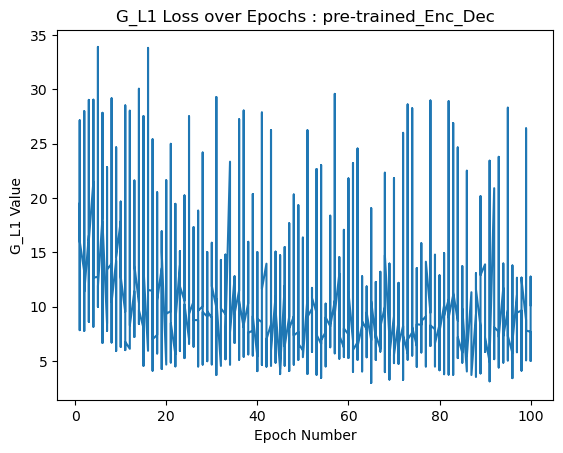

In [11]:
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    iteration_numbers = []
    g_l1_values = []

    with open(log_file, 'r') as file:
        for line in file:
            if line.startswith('('):
                parts = line.split()
                #print(parts[1], parts[3], parts[11])
                epoch_number = int(parts[1].strip(','))
                iteration_number = int(parts[3].strip(','))
                g_l1_value = float(parts[11])
                
                epoch_numbers.append(epoch_number)
                iteration_numbers.append(iteration_number)
                g_l1_values.append(g_l1_value)

    return epoch_numbers, iteration_numbers, g_l1_values

def plot_loss_graph(epoch_numbers, g_l1_values):
    plt.plot(epoch_numbers, g_l1_values)
    plt.xlabel('Epoch Number')
    plt.ylabel('G_L1 Value')
    plt.title('G_L1 Loss over Epochs : pre-trained_Enc_Dec')
    plt.show()

# Provide the path to the loss log file
loss_log_file = '/home/souraja/ResViT/checkpoints/CT_MRI_pre_trained_enc_dec/loss_log.txt'

epoch_numbers, _, g_l1_values = parse_loss_log(loss_log_file)
plot_loss_graph(epoch_numbers, g_l1_values)


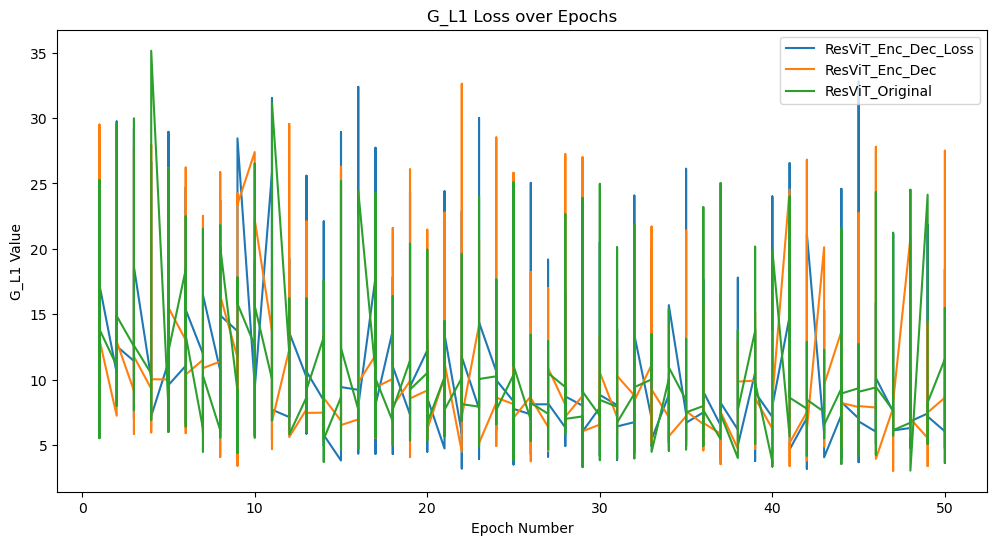

In [23]:
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    g_l1_values = []

    with open(log_file, 'r') as file:
        for line in file:
            if line.startswith('('):
                parts = line.split()
                epoch_number = int(parts[1].strip(','))
                g_l1_value = float(parts[11])
                
                epoch_numbers.append(epoch_number)
                g_l1_values.append(g_l1_value)

    return epoch_numbers, g_l1_values

def plot_loss_graph(loss_logs, labels):
    plt.figure(figsize=(12, 6))

    for i, loss_log in enumerate(loss_logs):
        epoch_numbers, g_l1_values = parse_loss_log(loss_log)
        plt.plot(epoch_numbers, g_l1_values, label=labels[i])

    plt.xlabel('Epoch Number')
    plt.ylabel('G_L1 Value')
    plt.title('G_L1 Loss over Epochs')
    plt.legend()
    plt.show()

# Provide the paths to the loss log files
loss_logs = [
    '/home/souraja/ResViT/checkpoints/CT_MRI_resvit_new_ls_enc_dec/loss_log.txt',
    '/home/souraja/ResViT/checkpoints/CT_MRI_resvit_enc_dec/loss_log.txt',
    '/home/souraja/ResViT/checkpoints/CT_MRI_resvit_orig/loss_log.txt',
    #'/home/souraja/ResViT/checkpoints/CT_MRI_pre_trained_new_ls_enc_dec/loss_log.txt',
]   

# Provide the labels for the loss logs
labels = [
    'ResViT_Enc_Dec_Loss',
    'ResViT_Enc_Dec',
    'ResViT_Original',
    #'Pretrained_Enc_Dec_Loss'
]

plot_loss_graph(loss_logs, labels)

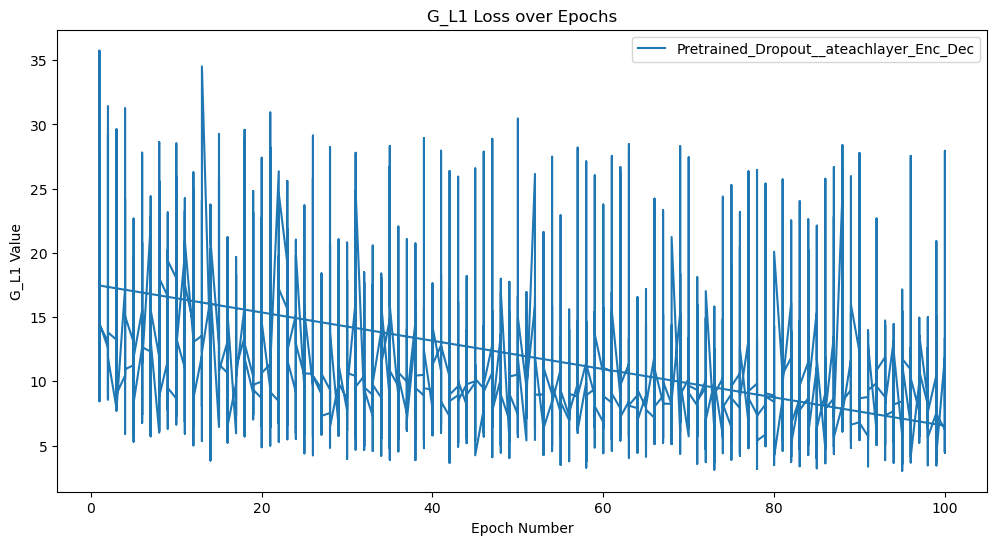

In [19]:
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    g_l1_values = []

    with open(log_file, 'r') as file:
        for line in file:
            if line.startswith('('):
                parts = line.split()
                epoch_number = int(parts[1].strip(','))
                g_l1_value = float(parts[11])
                
                epoch_numbers.append(epoch_number)
                g_l1_values.append(g_l1_value)

    return epoch_numbers, g_l1_values

def plot_loss_graph(loss_logs, labels):
    plt.figure(figsize=(12, 6))

    for i, loss_log in enumerate(loss_logs):
        epoch_numbers, g_l1_values = parse_loss_log(loss_log)
        plt.plot(epoch_numbers, g_l1_values, label=labels[i])

    plt.xlabel('Epoch Number')
    plt.ylabel('G_L1 Value')
    plt.title('G_L1 Loss over Epochs')
    plt.legend()
    plt.show()

# Provide the paths to the loss log files
loss_logs = [
    '/home/souraja/ResViT/checkpoints/CT_MRI_pre_trained_dropout_enc_dec/loss_log.txt',
    '/home/souraja/ResViT/checkpoints/CT_MRI_pre_trained_enc_dec/loss_log.txt',
    '/home/souraja/ResViT/checkpoints/CT_MRI_pre_trained_orig/loss_log.txt',
    '/home/souraja/ResViT/checkpoints/CT_MRI_pre_trained_new_ls_enc_dec/loss_log.txt',
]   

# Provide the labels for the loss logs
labels = [
    'Pretrained_Dropout__ateachlayer_Enc_Dec',
    'Pretrained_Enc_Dec',
    'Pretrained_Original',
    'Pretrained_Enc_Dec_Loss'
    
]

plot_loss_graph(loss_logs, labels)


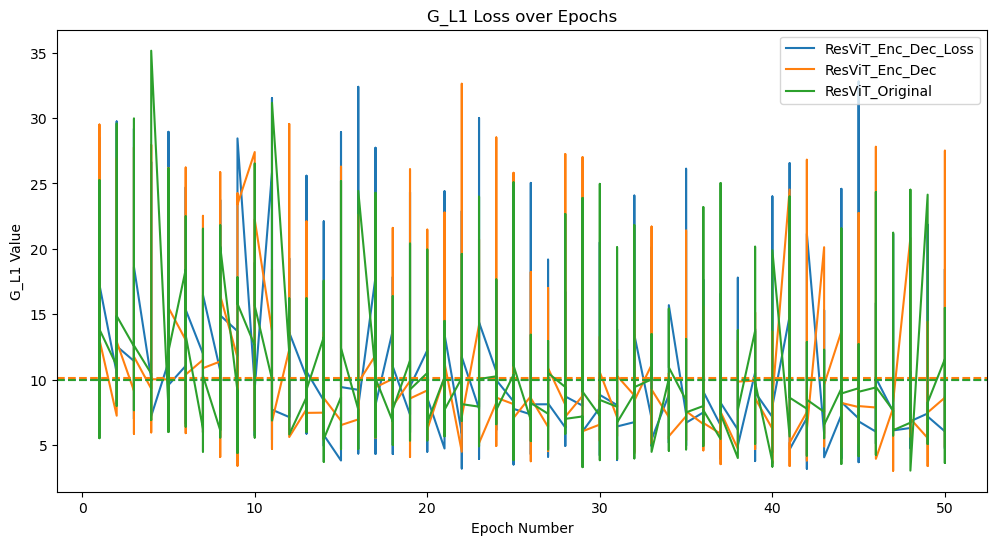

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def parse_loss_log(log_file):
    epoch_numbers = []
    g_l1_values = []

    with open(log_file, 'r') as file:
        for line in file:
            if line.startswith('('):
                parts = line.split()
                epoch_number = int(parts[1].strip(','))
                g_l1_value = float(parts[11])
                
                epoch_numbers.append(epoch_number)
                g_l1_values.append(g_l1_value)

    return epoch_numbers, g_l1_values

def plot_loss_graph(loss_logs, labels):
    plt.figure(figsize=(12, 6))

    for i, loss_log in enumerate(loss_logs):
        epoch_numbers, g_l1_values = parse_loss_log(loss_log)
        mean_g_l1 = np.mean(g_l1_values)  # Calculate mean of g_l1_values
        plt.plot(epoch_numbers, g_l1_values, label=labels[i])
        plt.axhline(mean_g_l1, linestyle='--', color=plt.gca().lines[-1].get_color())  # Plot horizontal line

    plt.xlabel('Epoch Number')
    plt.ylabel('G_L1 Value')
    plt.title('G_L1 Loss over Epochs')
    plt.legend()
    plt.show()

# Provide the paths to the loss log files
loss_logs = [
    '/home/souraja/ResViT/checkpoints/CT_MRI_resvit_new_ls_enc_dec/loss_log.txt',
    '/home/souraja/ResViT/checkpoints/CT_MRI_resvit_enc_dec/loss_log.txt',
    '/home/souraja/ResViT/checkpoints/CT_MRI_resvit_orig/loss_log.txt',
    #'/home/souraja/ResViT/checkpoints/CT_MRI_pre_trained_new_ls_enc_dec/loss_log.txt',
]   

# Provide the labels for the loss logs
labels = [
    'ResViT_Enc_Dec_Loss',
    'ResViT_Enc_Dec',
    'ResViT_Original',
    #'Pretrained_Enc_Dec_Loss'
]

plot_loss_graph(loss_logs, labels)
